In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (12, 6)

# Load Data

In [4]:
# read data into DataFrame
teams = pd.read_csv('2018_mlb_prospect_teams.csv')

In [5]:
# look at the data
teams.head()

,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code
0,Fernando,665487,Tatis Jr.,SS,8,1.0,2018,1,SD
1,MacKenzie,669022,Gore,LHP,19,2.0,2018,2,SD
2,Luis,649966,Urias,2B/SS,36,3.0,2018,3,SD
3,Cal,615698,Quantrill,RHP,40,4.0,2018,4,SD
4,Michel,673258,Baez,RHP,42,5.0,2018,5,SD


In [6]:
# read data into DataFrame
players = pd.read_csv('2018_mlb_prospect_players.csv')

In [7]:
# rename team_file_code columns as team
players = players.rename(columns={'team_file_code': 'team'})

In [8]:
# look at the data
players.head()

,arm,changeup,control,curve,curveball,cutter,cuverball,defense,fastball,field,...,positions,preseason100,preseason20,school,signed,team,thrw,twitter,weight,year
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,...,SS,8,1.0,NaN,"July 2, 2015 - CWS",SD,NaN,tatis_jr,NaN,NaN
1,NaN,55.0,55.0,NaN,60.0,NaN,NaN,NaN,65.0,NaN,...,LHP,19,2.0,NaN,NaN,SD,NaN,mgore181,NaN,NaN
2,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,...,2B/SS,36,3.0,NaN,"Dec. 27, 2013 - SD",SD,NaN,luisurias03,NaN,NaN
3,NaN,65.0,55.0,NaN,50.0,NaN,NaN,NaN,60.0,NaN,...,RHP,40,4.0,NaN,NaN,SD,NaN,cal_quantrill47,NaN,NaN
4,NaN,55.0,50.0,NaN,50.0,NaN,NaN,NaN,70.0,NaN,...,RHP,42,5.0,NaN,"Dec. 19, 2016 - SD",SD,NaN,BaezCruz1,NaN,NaN


# Join Team and Player Data

In [9]:
# look for duplicate players in the team data
teams['player_id'].value_counts()[:5]

660271    4
656713    4
656308    3
663656    3
666200    3
Name: player_id, dtype: int64

In [10]:
# look at what a player with multiple records looks like
teams[teams['player_id'] == '660271']

,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code
150,Shohei,660271,Ohtani,RHP/OF,1,1.0,2018,1,ANA
520,Shohei,660271,Ohtani,RHP/OF,1,1.0,2018,1,ANA
870,Shohei,660271,Ohtani,RHP/OF,1,1.0,2018,1,ANA
1033,Shohei,660271,Ohtani,RHP/OF,NaN,NaN,2018,4,ANA


In [11]:
# grab only the columns of interest
teams = teams[['player_id', 'position', 'rank']]

# sort by player_id then rank
teams = teams.sort_values(['player_id', 'rank'])

# remove duplicate players, keeping the highest rank
teams = teams.drop_duplicates(['player_id'], keep='first')

In [12]:
# set the player_id as the index in the DataFrame
players = players.set_index('player_id')
teams = teams.set_index('player_id')

In [13]:
# left join players to teams
df = players.join(teams, how='left')

# Inspect Data

## Teams

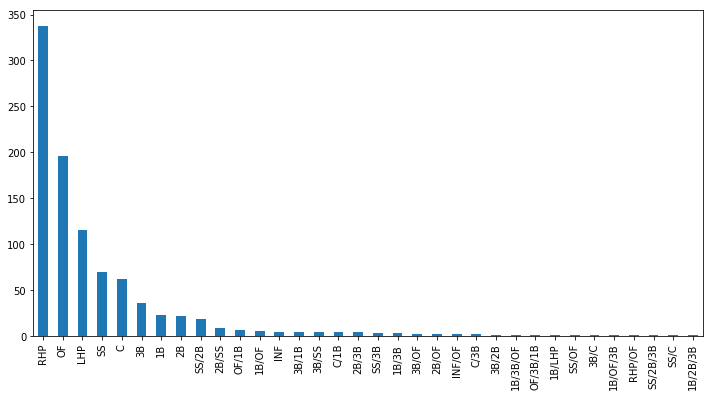

In [14]:
# count the number of players per team
teams['position'].value_counts().plot('bar')

## Players

In [15]:
# look at the first couple rows of the data
players.head()

,arm,changeup,control,curve,curveball,cutter,cuverball,defense,fastball,field,...,positions,preseason100,preseason20,school,signed,team,thrw,twitter,weight,year
player_id,,,,,,,,,,,,,,,,,,,,,
665487,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,...,SS,8,1.0,NaN,"July 2, 2015 - CWS",SD,NaN,tatis_jr,NaN,NaN
669022,NaN,55.0,55.0,NaN,60.0,NaN,NaN,NaN,65.0,NaN,...,LHP,19,2.0,NaN,NaN,SD,NaN,mgore181,NaN,NaN
649966,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,...,2B/SS,36,3.0,NaN,"Dec. 27, 2013 - SD",SD,NaN,luisurias03,NaN,NaN
615698,NaN,65.0,55.0,NaN,50.0,NaN,NaN,NaN,60.0,NaN,...,RHP,40,4.0,NaN,NaN,SD,NaN,cal_quantrill47,NaN,NaN
673258,NaN,55.0,50.0,NaN,50.0,NaN,NaN,NaN,70.0,NaN,...,RHP,42,5.0,NaN,"Dec. 19, 2016 - SD",SD,NaN,BaezCruz1,NaN,NaN


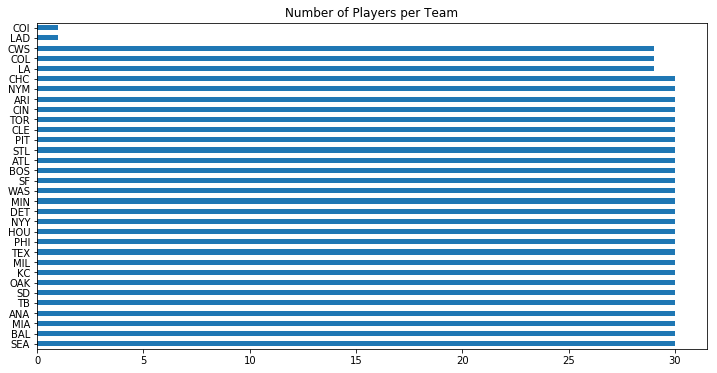

In [16]:
# plot the number of players per team
players['team'].value_counts().plot('barh', title='Number of Players per Team')

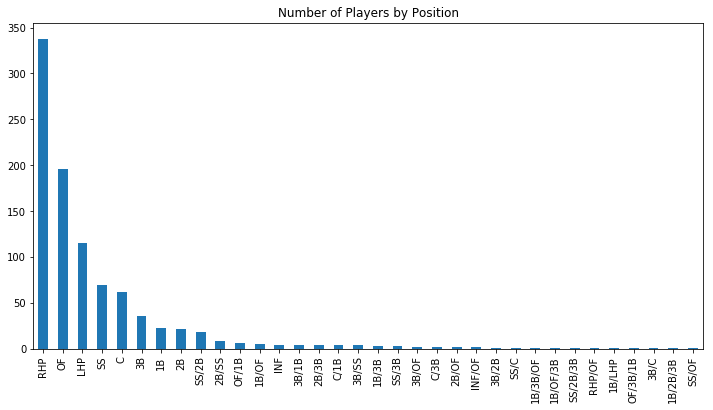

In [17]:
# count the number players by positions
players['positions'].value_counts().plot('bar', title='Number of Players by Position')

[]

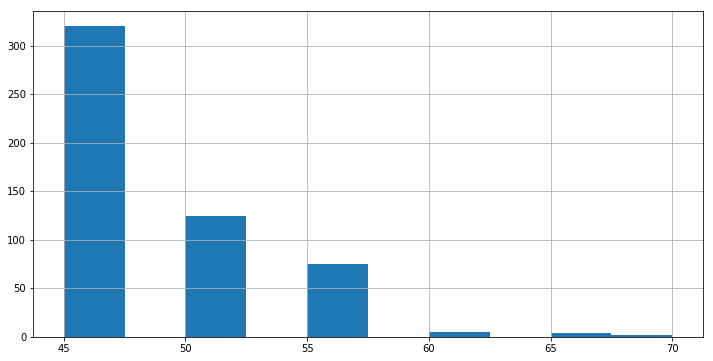

In [18]:
# calculate the average overall score
players['overall'].hist().plot()

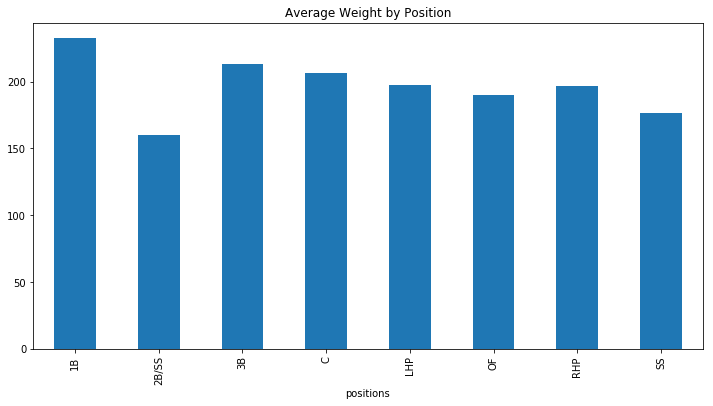

In [19]:
# subset DataFarme to positions and weight
position_weight = players[['positions', 'weight']]

# convert missing to NA
position_weight = position_weight.replace(r'\s+',np.nan,regex=True).replace('',np.nan)

# convert weight to integer
position_weight['weight'] = pd.to_numeric(position_weight['weight'])

# drop records with missing data
position_weight = position_weight.dropna(subset=['positions', 'weight'])

# group by position and calculate the average weight
position_weight.groupby('positions')['weight'].mean().plot('bar', title='Average Weight by Position')